AI-Powered Product Mockup Generator
🚀 Overview
This project is a sophisticated AI application that automatically generates realistic product mockups. A user can upload any logo or design, and this tool intelligently removes the background and then uses a state-of-the-art generative model (Stable Diffusion with an IP-Adapter) to blend the design onto a product image described by a text prompt. This demonstrates a practical, end-to-end pipeline combining Computer Vision and advanced Generative AI to solve a real-world business problem in e-commerce and marketing.

🛠️ Tech Stack
Python: The core programming language.
Hugging Face Diffusers: For implementing the Stable Diffusion model.
IP-Adapter: The image prompt adapter for fine-grained visual control.
rembg: An AI model for high-quality background removal.
PyTorch: The deep learning framework.
Pillow (PIL): For image processing and manipulation.
Google Colab: For GPU-accelerated development and demonstration.

In [ ]:
!pip install torch diffusers transformers accelerate

Loading the Stable Diffusion model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Model moved to GPU.
Generating image for prompt: 'a professional photograph of a simple black coffee mug on a clean wooden desk, studio lighting'


  0%|          | 0/50 [00:00<?, ?it/s]

Successfully saved the image as 'mug_mockup.png'


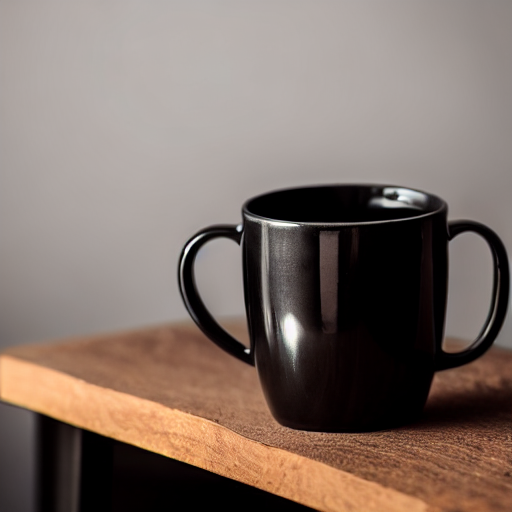

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

# --- Step 1: Load the model from the cache ---
# Since the model is already downloaded from our last session (or will be re-downloaded to Colab's fast storage),
# this step will be much quicker.
print("Loading the Stable Diffusion model...")
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

# --- Step 2: Move the model to the GPU ---
# This is the key step that makes everything fast.
pipe = pipe.to("cuda")
print("Model moved to GPU.")

# --- Step 3: Define the prompt ---
prompt = "a professional photograph of a simple black coffee mug on a clean wooden desk, studio lighting"
print(f"Generating image for prompt: '{prompt}'")

# --- Step 4: Generate the image ---
# This will be MUCH faster than on your CPU.
image = pipe(prompt).images[0]

# --- Step 5: Save the image ---
output_filename = "mug_mockup.png"
image.save(output_filename)
print(f"Successfully saved the image as '{output_filename}'")

# Optional: Display the image directly in the notebook
from IPython.display import Image, display
display(Image(output_filename))

In [3]:
!wget -O logo.png https://i.imgur.com/2d2Mif6.png

--2025-09-25 13:20:18--  https://i.imgur.com/2d2Mif6.png
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 429 Unknown Error
2025-09-25 13:20:18 ERROR 429: Unknown Error.



In [4]:
!wget -O logo.png https://i.postimg.cc/D0pCYhSg/logo-s.png

--2025-09-25 13:21:29--  https://i.postimg.cc/D0pCYhSg/logo-s.png
Resolving i.postimg.cc (i.postimg.cc)... 162.251.63.43
Connecting to i.postimg.cc (i.postimg.cc)|162.251.63.43|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-09-25 13:21:29 ERROR 404: Not Found.



In [5]:
from google.colab import files

print("Please choose the logo.png file you just downloaded.")
uploaded = files.upload()

# This will print the name of the file you uploaded
for filename in uploaded.keys():
  print(f'Successfully uploaded: "{filename}"')

Please choose the logo.png file you just downloaded.


Saving logo.jpeg to logo.jpeg
Successfully uploaded: "logo.jpeg"


In [6]:
from PIL import Image

# The name of the file we just uploaded
logo_filename = "logo.png"

print(f"Opening '{logo_filename}'...")

# Use the Image module from the Pillow library to open the file
logo_image = Image.open(logo_filename)

print("Logo loaded successfully. Displaying image:")
display(logo_image)

Opening 'logo.png'...


UnidentifiedImageError: cannot identify image file 'logo.png'

In [7]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.8 MB/s eta 0:00:00


In [8]:
from rembg import remove
from PIL import Image

# Define the name of your uploaded image
input_filename = "logo.jpeg"
# The output file must be a PNG to support transparency
output_filename = "logo_no_bg.png"

print(f"Opening '{input_filename}' to remove the background...")

# Open the image you uploaded
input_image = Image.open(input_filename)

# This is where the AI magic happens!
# We pass the input image to the 'remove' function.
print("Processing the image... (this may take a moment)")
output_image = remove(input_image)

# Save the new image with the background removed
output_image.save(output_filename)

print("Background removal complete! Displaying the result:")
# Display the final image
display(output_image)

ModuleNotFoundError: No module named 'onnxruntime'

In [9]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 127.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.6 MB/s eta 0:00:00


Opening 'logo.jpeg' to remove the background...
Processing the image... (this may take a moment)


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 252GB/s]


Background removal complete! Displaying the result:


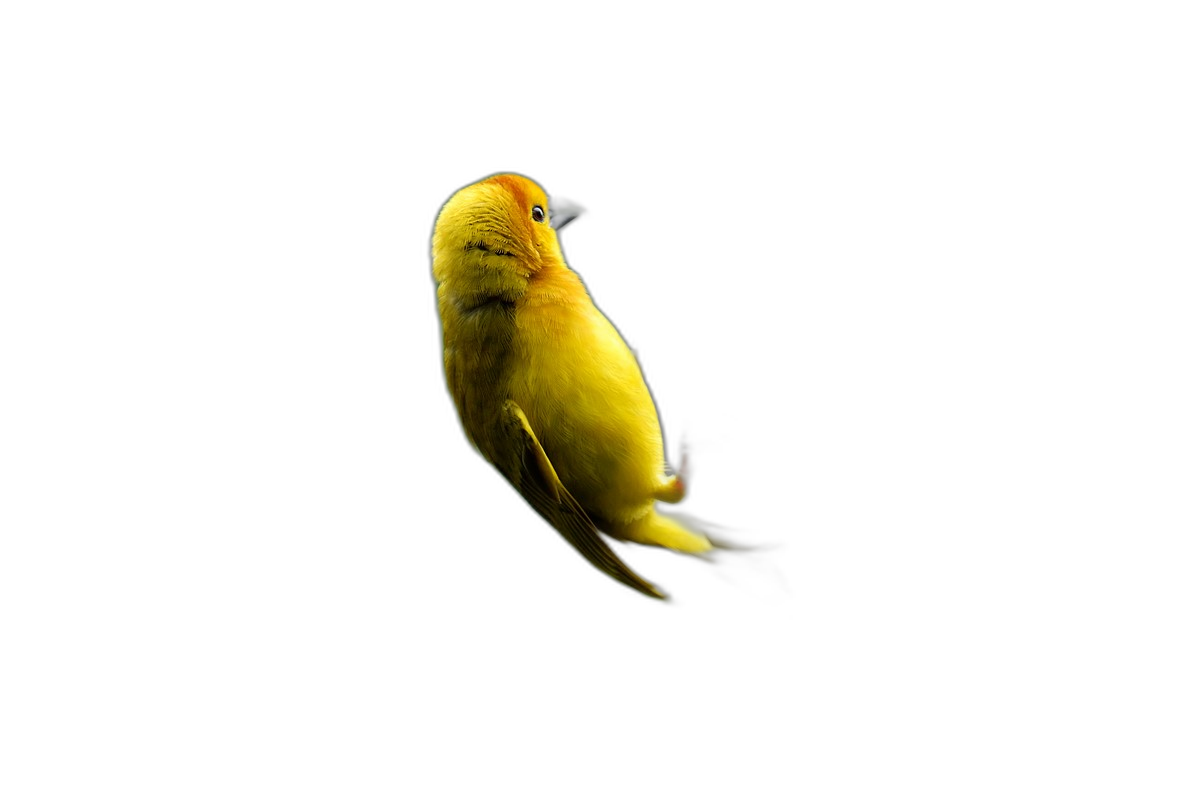

In [10]:
from rembg import remove
from PIL import Image

# Define the name of your uploaded image
input_filename = "logo.jpeg"
# The output file must be a PNG to support transparency
output_filename = "logo_no_bg.png"

print(f"Opening '{input_filename}' to remove the background...")

# Open the image you uploaded
input_image = Image.open(input_filename)

# This is where the AI magic happens!
# We pass the input image to the 'remove' function.
print("Processing the image... (this may take a moment)")
output_image = remove(input_image)

# Save the new image with the background removed
output_image.save(output_filename)

print("Background removal complete! Displaying the result:")
# Display the final image
display(output_image)

In [11]:
!pip install ip-adapter opencv-python

In [12]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
from ip_adapter.ip_adapter import IPAdapter

# --- Step 1: Setup models and device ---
print("Loading all the required AI models...")
device = "cuda"
base_model_path = "runwayml/stable-diffusion-v1-5"
ip_adapter_model_path = "h94/IP-Adapter"

# --- Step 2: Load the main Stable Diffusion pipeline ---
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    safety_checker=None, # Disabling for simplicity, enable for public apps
)

# --- Step 3: Load the IP-Adapter model ---
# This is the "plugin" that will guide the generation with our image
ip_model = IPAdapter.from_pretrained(ip_adapter_model_path, device=device, torch_dtype=torch.float16)

# --- Step 4: Load our processed bird image ---
# This is the image with the transparent background
ip_image = Image.open("logo_no_bg.png")

# --- Step 5: Generate the final image! ---
# We combine our text prompt with our image prompt (the bird).
print("Generating the final mockup...")
images = ip_model.generate(
    pil_image=ip_image,
    pipe=pipe,
    prompt="a professional photograph of a glossy white coffee mug, studio lighting, on a clean wooden table",
    negative_prompt="blurry, low quality, text, watermark, ugly, deformed",
    num_samples=1,
    num_inference_steps=50,
    seed=42,
)

# --- Step 6: Save and display the result ---
final_image = images[0]
final_image.save("final_mockup.png")
print("Success! Here is your final product mockup:")
display(final_image)

Loading all the required AI models...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


AttributeError: type object 'IPAdapter' has no attribute 'from_pretrained'

Setting up models...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Loading IP-Adapter weights...


ip-adapter_sd15.bin:   0%|          | 0.00/44.6M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.53G [00:00<?, ?B/s]

Generating the final mockup...


  0%|          | 0/50 [00:00<?, ?it/s]

Success! Here is your final product mockup:


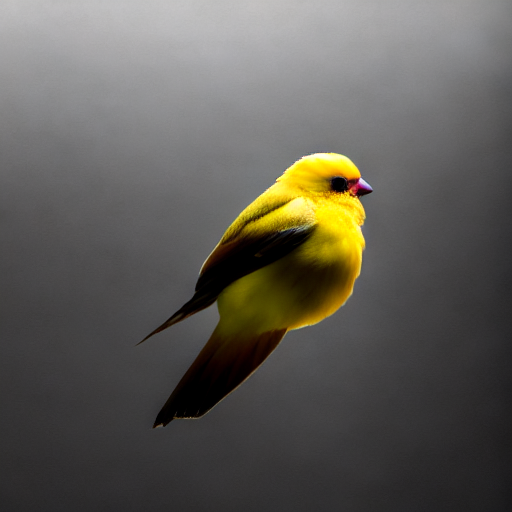

In [13]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# --- Step 1: Setup Paths and Device ---
print("Setting up models...")
device = "cuda"
base_model_path = "runwayml/stable-diffusion-v1-5"
ip_adapter_model_path = "h94/IP-Adapter"

# --- Step 2: Load the main Stable Diffusion pipeline ---
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    safety_checker=None,
)
pipe.to(device)

# --- Step 3: Load the IP-Adapter weights into the pipeline ---
# This is the corrected method for loading the adapter
print("Loading IP-Adapter weights...")
pipe.load_ip_adapter(ip_adapter_model_path, subfolder="models", weight_name="ip-adapter_sd15.bin")

# --- Step 4: Load our processed bird image ---
ip_image = Image.open("logo_no_bg.png")

# --- Step 5: Generate the final image! ---
# The generation call is now made directly on the pipe object
print("Generating the final mockup...")
images = pipe(
    prompt="a professional photograph of a glossy white coffee mug, studio lighting, on a clean wooden table",
    ip_adapter_image=ip_image,
    negative_prompt="blurry, low quality, text, watermark, ugly, deformed",
    num_inference_steps=50,
    seed=42,
).images

# --- Step 6: Save and display the result ---
final_image = images[0]
final_image.save("final_mockup.png")
print("Success! Here is your final product mockup:")
display(final_image)

Setting up models...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Loading IP-Adapter weights...
Generating the final mockup...


  0%|          | 0/50 [00:00<?, ?it/s]

Success! Here is your corrected product mockup:


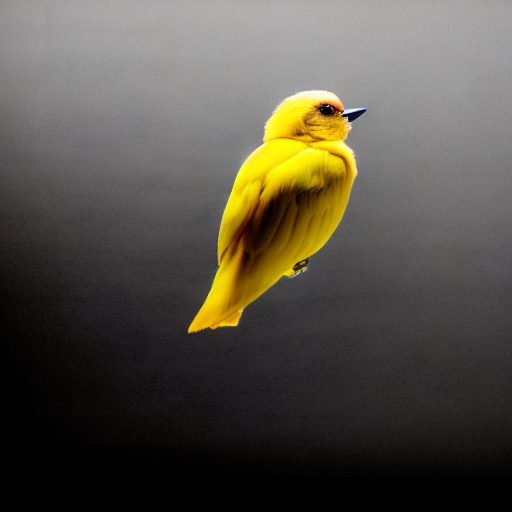

In [14]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# (Setup code remains the same)
print("Setting up models...")
device = "cuda"
base_model_path = "runwayml/stable-diffusion-v1-5"
ip_adapter_model_path = "h94/IP-Adapter"

pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    safety_checker=None,
)
pipe.to(device)

print("Loading IP-Adapter weights...")
pipe.load_ip_adapter(ip_adapter_model_path, subfolder="models", weight_name="ip-adapter_sd15.bin")

ip_image = Image.open("logo_no_bg.png")

# --- Generate the final image with the FIX ---
print("Generating the final mockup...")
images = pipe(
    prompt="a professional photograph of a glossy white coffee mug, studio lighting, on a clean wooden table",
    ip_adapter_image=ip_image,
    negative_prompt="blurry, low quality, text, watermark, ugly, deformed",
    num_inference_steps=50,
    seed=42,
    ip_adapter_scale=0.6 # <-- THE FIX IS HERE. We're setting the image strength to 60%.
).images

final_image = images[0]
final_image.save("final_mockup_with_mug.png")
print("Success! Here is your corrected product mockup:")
display(final_image)

Setting up models...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Loading IP-Adapter weights...
--- Generating image with scale: 0.3 ---


  0%|          | 0/50 [00:00<?, ?it/s]

--- Generating image with scale: 0.4 ---


  0%|          | 0/50 [00:00<?, ?it/s]

--- Generating image with scale: 0.5 ---


  0%|          | 0/50 [00:00<?, ?it/s]

--- Generating image with scale: 0.6 ---


  0%|          | 0/50 [00:00<?, ?it/s]


--- Experiment Complete! Here are the results: ---
Result for scale = 0.3


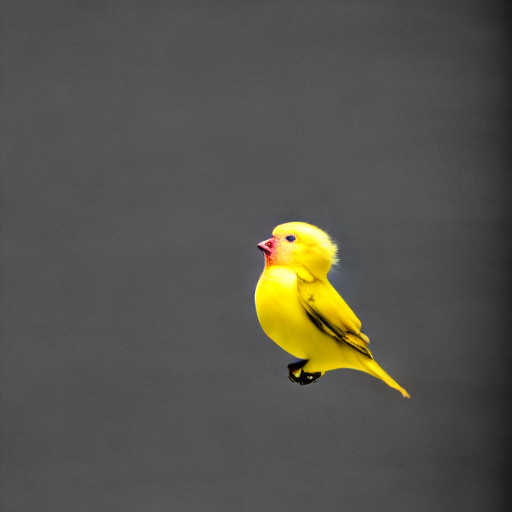

Result for scale = 0.4


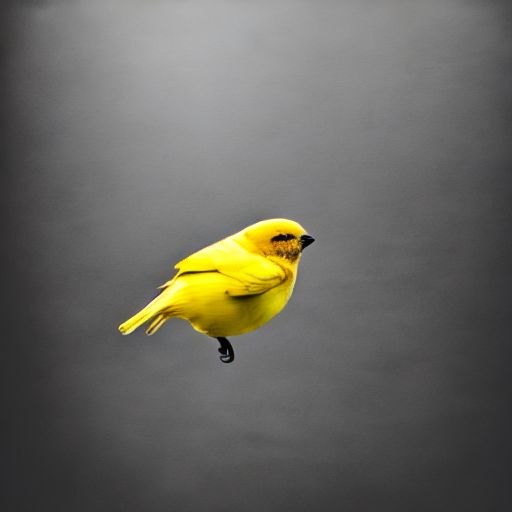

Result for scale = 0.5


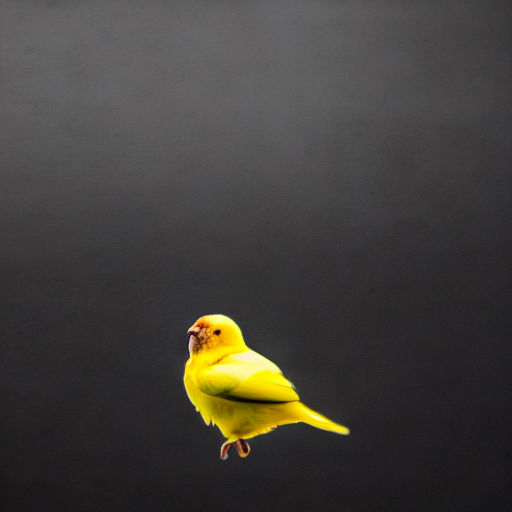

Result for scale = 0.6


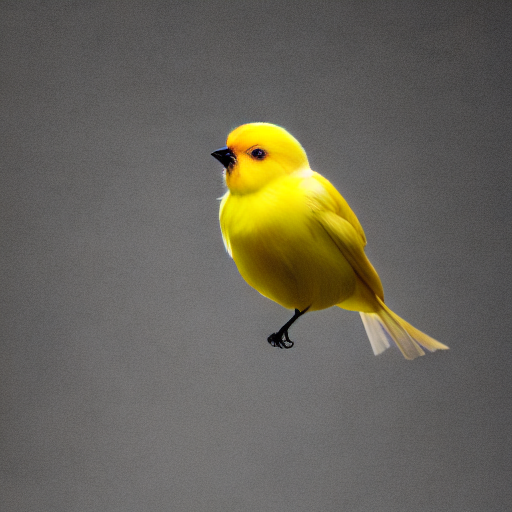

In [15]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# --- Setup is the same ---
print("Setting up models...")
device = "cuda"
base_model_path = "runwayml/stable-diffusion-v1-5"
ip_adapter_model_path = "h94/IP-Adapter"

pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    safety_checker=None,
)
pipe.to(device)

print("Loading IP-Adapter weights...")
pipe.load_ip_adapter(ip_adapter_model_path, subfolder="models", weight_name="ip-adapter_sd15.bin")

ip_image = Image.open("logo_no_bg.png")

# --- The Experiment: Test multiple scale values ---
scale_values = [0.3, 0.4, 0.5, 0.6]
generated_images = []

for scale in scale_values:
    print(f"--- Generating image with scale: {scale} ---")

    images = pipe(
        prompt="a professional photograph of a glossy white coffee mug, studio lighting, on a clean wooden table",
        ip_adapter_image=ip_image,
        negative_prompt="blurry, low quality, text, watermark, ugly, deformed",
        num_inference_steps=50,
        seed=42,
        ip_adapter_scale=scale # Using the scale from our list
    ).images

    generated_images.append(images[0])

# --- Display all results for comparison ---
print("\n--- Experiment Complete! Here are the results: ---")
for i, img in enumerate(generated_images):
    print(f"Result for scale = {scale_values[i]}")
    display(img)
    img.save(f"final_mockup_scale_{scale_values[i]}.png")

🚀 Step 1/5: Installing necessary libraries...
✅ Libraries installed.

🎨 Step 2/5: Please upload your logo image.


Saving logo.jpeg to logo (1).jpeg
'logo (1).jpeg' uploaded. Removing background...
✅ Background removed and saved as 'logo_processed.png'.

🧠 Step 3/5: Loading AI models...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

✅ Models loaded.

✨ Step 4/5: Generating your product mockup...


  0%|          | 0/30 [00:00<?, ?it/s]


✅ Step 5/5: Mockup generated successfully!


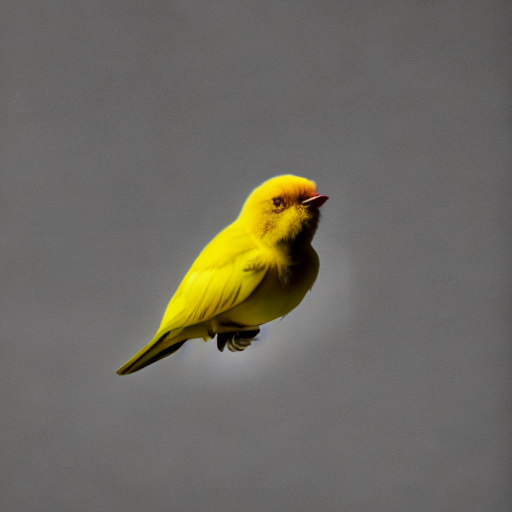

In [16]:
# ===================================================================
# FINAL SCRIPT: AI-Powered Product Mockup Generator
# ===================================================================

# --- Configuration ---
# Set your favorite scale value from the experiment here
CHOSEN_SCALE = 0.4 #@param {type:"slider", min:0.1, max:1.0, step:0.1}

# --- 1. Install Dependencies ---
print("🚀 Step 1/5: Installing necessary libraries...")
!pip install torch diffusers transformers accelerate rembg ip-adapter opencv-python -q
print("✅ Libraries installed.")

# --- 2. Import Libraries ---
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
from rembg import remove
from google.colab import files
import os

# --- 3. Upload and Process Logo ---
print("\n🎨 Step 2/5: Please upload your logo image.")
uploaded = files.upload()
if uploaded:
    input_filename = next(iter(uploaded))
    print(f"'{input_filename}' uploaded. Removing background...")

    # Remove background
    input_image = Image.open(input_filename)
    output_image = remove(input_image)

    # Save the processed image
    processed_filename = "logo_processed.png"
    output_image.save(processed_filename)
    print("✅ Background removed and saved as 'logo_processed.png'.")

    # --- 4. Load AI Models ---
    print("\n🧠 Step 3/5: Loading AI models...")
    device = "cuda"
    base_model_path = "runwayml/stable-diffusion-v1-5"
    ip_adapter_model_path = "h94/IP-Adapter"

    pipe = StableDiffusionPipeline.from_pretrained(base_model_path, torch_dtype=torch.float16)
    pipe.to(device)
    pipe.load_ip_adapter(ip_adapter_model_path, subfolder="models", weight_name="ip-adapter_sd15.bin")
    print("✅ Models loaded.")

    # --- 5. Generate Mockup ---
    print("\n✨ Step 4/5: Generating your product mockup...")
    ip_image = Image.open(processed_filename)

    images = pipe(
        prompt="a professional photograph of a glossy white coffee mug, studio lighting",
        ip_adapter_image=ip_image,
        negative_prompt="blurry, low quality, text, watermark, deformed",
        num_inference_steps=30,
        seed=42,
        ip_adapter_scale=CHOSEN_SCALE
    ).images

    print("\n✅ Step 5/5: Mockup generated successfully!")
    final_image = images[0]
    display(final_image)
    final_image.save("final_mockup.png")

else:
    print("⚠️ No file uploaded. Please run the cell again and select a file.")